In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV, cross_val_predict

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

In [51]:
df = load_iris(as_frame=True).data
df.dropna(inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
np.corrcoef(df)

array([[1.        , 0.99599866, 0.99997391, ..., 0.65347343, 0.6339168 ,
        0.63315839],
       [0.99599866, 1.        , 0.99660709, ..., 0.70898277, 0.68625679,
        0.68483481],
       [0.99997391, 0.99660709, 1.        , ..., 0.65755616, 0.63763128,
        0.6368058 ],
       ...,
       [0.65347343, 0.70898277, 0.65755616, ..., 1.        , 0.99570813,
        0.99446012],
       [0.6339168 , 0.68625679, 0.63763128, ..., 0.99570813, 1.        ,
        0.99991588],
       [0.63315839, 0.68483481, 0.6368058 , ..., 0.99446012, 0.99991588,
        1.        ]])

In [22]:
kmc = KMeans(n_clusters=5, init="random", n_init=50, max_iter=500, random_state=10)
kmc.fit(df)

KMeans(init='random', max_iter=500, n_clusters=5, n_init=50, random_state=10)

In [23]:
kmc.inertia_

46.44618205128205

In [28]:
kmeans_kwargs = {
    "init" : "random",
    "n_init" : 50,
    "max_iter" : 500,
    "random_state" : 10
}

sse_digits = []

for k in range(1, 12) :
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    print("K = ", k, " : ", kmeans.inertia_)
    sse_digits.append(kmeans.inertia_)

K =  1  :  681.3706
K =  2  :  152.3479517603579
K =  3  :  78.85144142614601
K =  4  :  57.22847321428571
K =  5  :  46.44618205128205
K =  6  :  39.03998724608725
K =  7  :  34.29822966507177
K =  8  :  30.015880952380954
K =  9  :  28.146938933873145
K =  10  :  26.723627572376028
K =  11  :  24.374128327812542


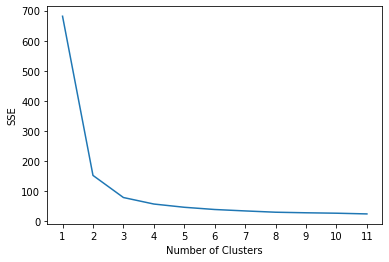

In [26]:
plt.plot(range(1, 12), sse_digits)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [29]:
df = load_iris(as_frame=True).data
df.dropna(inplace=True)

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
agc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agc.fit(df)

AgglomerativeClustering(n_clusters=3)

In [48]:
agc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [49]:
agc.n_leaves_

150

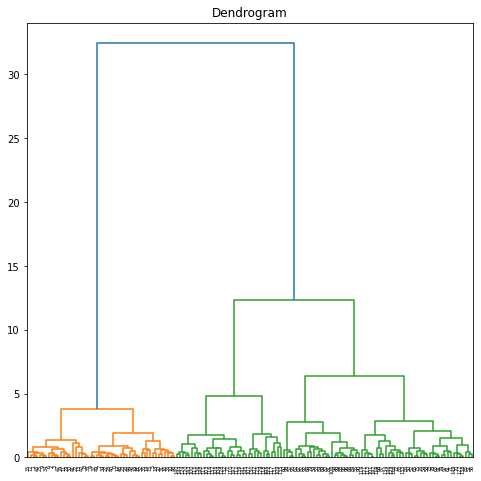

In [35]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8, 8))
plt.title("Dendrogram")

dend = shc.dendrogram(shc.linkage(df, method="ward"))

In [76]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [85]:
s = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv")

In [86]:
s.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [88]:
s["status_type"].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [64]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv")
df.drop(columns=["Column1", "Column2", "Column3", "Column4", "status_id", "status_published"], inplace=True)
df.dropna(axis=1, inplace=True)
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [65]:
y = df["status_type"]
df.drop(columns=["status_type"], inplace=True)

array([[529, 512, 262, 432,  92,   3,   1,   1,   0],
       [150,   0,   0, 150,   0,   0,   0,   0,   0],
       [227, 236,  57, 204,  21,   1,   1,   0,   0],
       [111,   0,   0, 111,   0,   0,   0,   0,   0],
       [213,   0,   0, 204,   9,   0,   0,   0,   0]], dtype=int64)

In [78]:
y = LabelEncoder().fit_transform(y)
y

array([3, 1, 3, ..., 1, 1, 1])

In [79]:
X = df.to_numpy()
X[:5]

array([[529, 512, 262, 432,  92,   3,   1,   1,   0],
       [150,   0,   0, 150,   0,   0,   0,   0,   0],
       [227, 236,  57, 204,  21,   1,   1,   0,   0],
       [111,   0,   0, 111,   0,   0,   0,   0,   0],
       [213,   0,   0, 204,   9,   0,   0,   0,   0]], dtype=int64)

In [80]:
X = StandardScaler().fit_transform(X)
X[:5]

array([[ 0.64610394,  0.32335035,  1.6868788 ,  0.48272661,  1.98326643,
         0.1961959 ,  0.07671305,  0.47357035, -0.15574803],
       [-0.17319166, -0.25220622, -0.3041444 , -0.14472021, -0.3184544 ,
        -0.147879  , -0.17600986, -0.152587  , -0.15574803],
       [-0.00673846,  0.01308938,  0.12901714, -0.02457082,  0.2069384 ,
        -0.03318737,  0.07671305, -0.152587  , -0.15574803],
       [-0.25749912, -0.25220622, -0.3041444 , -0.23149477, -0.3184544 ,
        -0.147879  , -0.17600986, -0.152587  , -0.15574803],
       [-0.03700268, -0.25220622, -0.3041444 , -0.02457082, -0.09328605,
        -0.147879  , -0.17600986, -0.152587  , -0.15574803]])

In [107]:
kmc = KMeans(n_clusters=2, random_state=10)
kmc.fit(X)

KMeans(n_clusters=2, random_state=10)

In [108]:
kmc.inertia_

48278.09824220542

In [110]:
y_pred = kmc.predict(X)

In [115]:
res = np.where((y_pred == y), 1, 0)
a, b = np.unique(res, return_counts=True)
print(a)
print(b)

[0 1]
[6969   81]


In [133]:
agc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
res = agc.fit(X)

In [134]:
res.n_leaves_

7050

In [139]:
y_pred = res.labels_
print("FOR FIRST ROW : ", y_pred[0])
c = np.where((y_pred == y), 1, 0)
a, b = np.unique(c, return_counts=True)
print(a)
print(b)

FOR FIRST ROW :  3
[0 1]
[5041 2009]


In [136]:
from sklearn.metrics import accuracy_score

In [137]:
accuracy_score(y, y_pred)

0.2849645390070922

In [132]:
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(8, 8))
# plt.title("Dendrogram")

# dend = shc.dendrogram(shc.linkage(X, method="ward"))